In [ ]:
# Instalando e atualizando as bibliotecas necessárias
!pip install pyDOE
!pip install -U seaborn

In [10]:
# Importando RASD Toolbox
from RASD_TOOLBOX import *
# Importando Numpy toolbox
import numpy as n
import pandas as pd

In [11]:
w = ['NORMAL', 0.25, 0.025]
P = ['NORMAL', 10.2, 1.12]
Fy = ['NORMAL', 40.3, 4.64]

POP = [1000]

#POP = np.arange(10,1000000, 10000).tolist() # (x,y,Z); x=pop inicial; y=pop final; z=variacao pop

SETUP = {'N_REP': len(POP),
        'POP': POP,
        'N_G': 1,
        'D': 3,
        'VARS': [w, P, Fy],
        'MODEL': 'MCS'}

In [12]:
def OBJ(X):
        
    w = X[0]
    P = X[1]
    Fy = X[2]
    
    
    # STATE LIMIT FUNCTION
    
    R_0 = 80 * Fy
    S_0 = 54 * P + 5832 * w
    G_0 = S_0 - R_0

    R = [R_0] 
    S = [S_0] 
    G = [G_0]

   # p2 = P.tolist()
    #df = pd.DataFrame([P])

    #print(df[0])
    
    return R, S, G

In [13]:
RESULTS_TEST = RASD_STOCHASTIC(SETUP, OBJ)

<class 'numpy.ndarray'>
[[ 0.23889834 10.54552132 41.34440118]
 [ 0.25491819  8.40948386 36.52759451]
 [ 0.26063071 10.58980274 36.22736595]
 ...
 [ 0.25439158 10.19485931 45.71983677]
 [ 0.24137969  9.1202238  37.38042918]
 [ 0.24514103 13.70541905 38.93336927]]


In [14]:
RESULTS_TEST[len(POP)-1]['TOTAL RESULTS']

,X_0,X_1,X_2,R_0,S_0,G_0,I_0
0,0.238898,10.545521,41.344401,3307.552095,1962.713276,-1344.838818,0.0
1,0.254918,8.409484,36.527595,2922.207560,1940.795021,-981.412540,0.0
2,0.260631,10.589803,36.227366,2898.189276,2091.847668,-806.341608,0.0
3,0.254451,9.893139,38.565571,3085.245719,2018.186735,-1067.058985,0.0
4,0.215570,9.607569,39.125966,3130.077276,1776.014834,-1354.062442,0.0
...,...,...,...,...,...,...,...
995,0.303103,8.752220,39.749906,3179.992512,2240.317221,-939.675291,0.0
996,0.271843,9.750210,43.759889,3500.791149,2111.896788,-1388.894360,0.0
997,0.254392,10.194859,45.719837,3657.586941,2034.134091,-1623.452851,0.0
998,0.241380,9.120224,37.380429,2990.434335,1900.218426,-1090.215909,0.0


In [15]:
DADOS = RESULTS_TEST[len(POP)-1]['TOTAL RESULTS']

In [20]:
RESULTS_TEST[len(POP)-1]['TOTAL RESULTS']['I_0'].sum()

0.0

C:\Users\Donizetti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


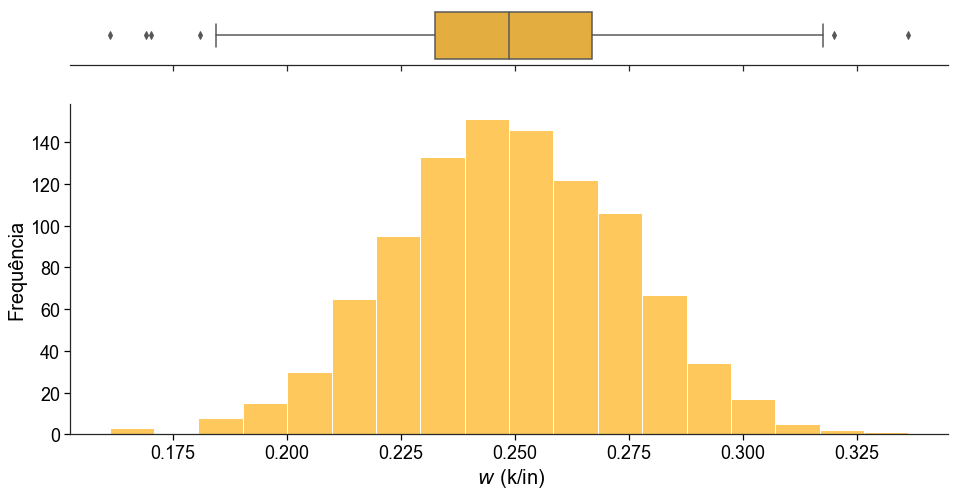

In [16]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'WIDTH': 0.40, 
                'HEIGHT': 0.20, 
                'X AXIS SIZE': 18,
                'Y AXIS SIZE': 18,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': ' $w$ (k/in)',
                'LABELS SIZE': 20,
                'LABELS COLOR': '#000000',  
                'CHART COLOR': '#FEB625',
                'KDE': False,
                'DPI': 600, 
                'BINS' : 18,
                'EXTENSION': '.svg'}
# RESULTS X_0 VARIABLE
OPCOES_DADOS = {'DATASET': DADOS, 'COLUMN': 'X_0'}      
# CALL PLOT
RASD_PLOT_1(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.300, 
                'HEIGHT': 0.150,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 16,
                'Y AXIS SIZE': 16,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 18,
                'LABELS COLOR': '#000000',
                'LOC LEGEND': 'lower right',
                'TITLE LEGEND': 'Índice de falha (I):'}
# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'HUE VALUE': 'I_0'}    
# CALL PLOT
RASD_PLOT_2(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.20, 
                'HEIGHT': 0.10,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 16,
                'Y AXIS SIZE': 16,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 18,
                'LABELS COLOR': '#000000',
                'G VALUE': 'G_0',
                'TRANSPARENCY': 0.8,
                'COLOR MAP': 'viridis'}


# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'G VALUE': 'G_0'}       

# CALL PLOT
RASD_PLOT_3(OPCOES_DADOS, OPCOES_GRAFICAS)

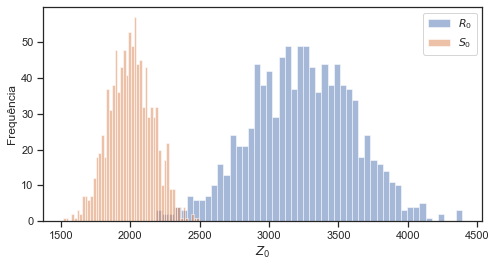

In [22]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X DATA': 'S_0',
                    'Y DATA': 'R_0',
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#00000',
                    'X AXIS LABEL': '$Z_0$',
                    'Y AXIS LABEL': 'Frequência',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'C VALUE': 'G_0',
                    'TRANSPARENCY': 0.8,
                    'COLOR MAP': 'viridis',
                    'BINS': '50',
                    'ALPHA': '0.5'}

# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'R_0', 'Y DATA': 'S_0', 'G VALUE': 'G_0'}       

# CALL PLOT
RASD_PLOT_4(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#000000',
                    'X AXIS LABEL': 'Número de Simulações (ns)',
                    'Y AXIS LABEL': 'Beta',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'CHART COLOR': 'blue',
                    'POPULATION' : POP,
                    'TYPE' : 'pf'}

# RESULTS
OPCOES_DADOS = {'DATASET': RESULTS_TEST}       

# CALL PLOT
RASD_PLOT_5(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
max(POP)

In [ ]:
plt.plot( pd.Series(range(0,len(RESULTS_TEST[0]['TOTAL RESULTS']))), RESULTS_TEST[0]['TOTAL RESULTS']['I_0'], color='blue')

In [ ]:
#MESMO DATAFRAME
Bf = [ ]
Af = [ ]
c = 100
BETA_DF = pd.read_csv('RASD_TOOLBOX/beta_df.txt', delimiter = ";",  names = ['PF' ,'BETA'])

for i in POP:
   Af.append((RESULTS_TEST[len(POP)-1]['TOTAL RESULTS']['I_0'].head(i).sum())/max(POP)) # soma valores anteriores de I_0 e calcula PF

df = pd.DataFrame(Af,columns=['Pf']) #converte para DF

for i in range(len(POP)): #Salva os valores em um DF a cada 100 valores
    Bf.append((BETA_DF['PF'].sub(Af[i]).abs().idxmin())/1000)
  
plt.plot(POP, Bf, color='blue')

#plt.plot( pd.Series(range(0,len(RESULTS_TEST[0]['TOTAL RESULTS']),c)), Bf, color='blue')

#plt.plot( pd.Series(range(0,len(RESULTS_TEST[0]['TOTAL RESULTS']))), RESULTS_TEST[0]['TOTAL RESULTS']['I_0'], color='blue')

In [ ]:
plt.plot(POP, Af, color='blue')

In [ ]:
PF_AUX = []
BETA_AUX = []

for i in range (len(POP)):
    PF_AUX.append(RESULTS_TEST[i]['PROBABILITY OF FAILURE'][0])
    BETA_AUX.append(RESULTS_TEST[i]['BETA INDEX'][0])

plt.plot(POP, PF_AUX, color='blue')

In [ ]:
plt.plot(POP, BETA_AUX, color='blue')